### Notebook for generating the figures in the paper


Cantidad de nodos: 476


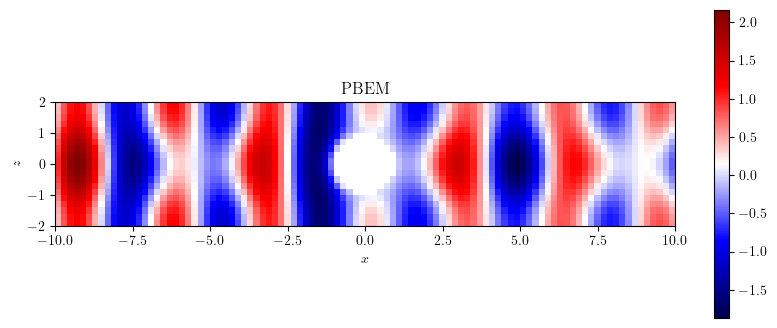

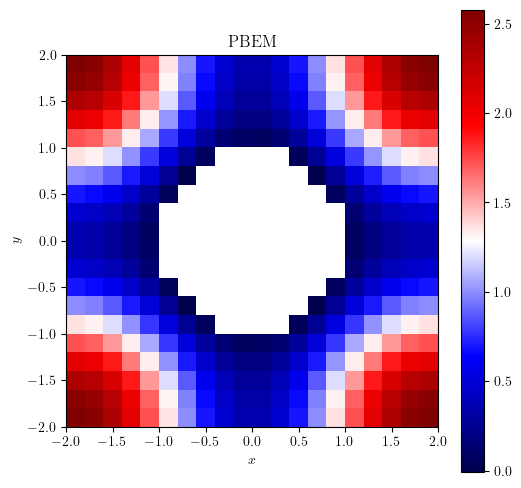


Cantidad de nodos: 476


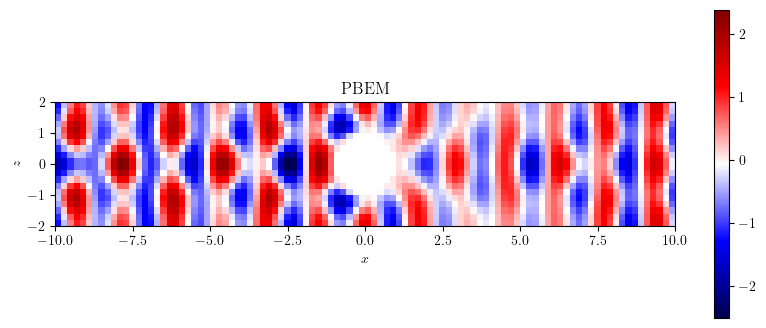

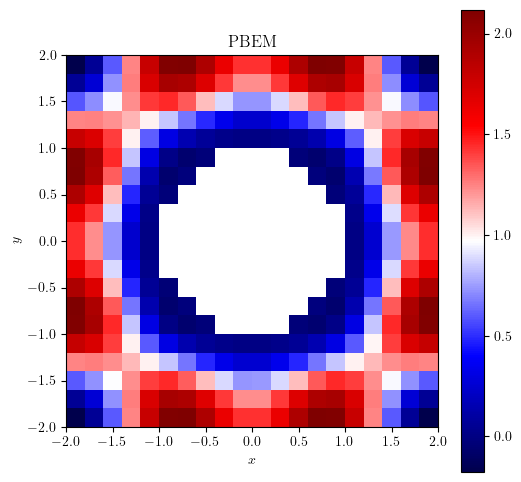

In [1]:
from os import chdir
import numpy as np

chdir("../")
d = 4
process = [4, 8]
for mult in process:
    k = mult * 2 / d
    v = np.array([1, 0, 0], dtype=np.complex64)
    beta = d * k * v
    M = 100

    from pypbem.utils.threeD import get_sphere_grid

    grid = get_sphere_grid(0.3)
    print(f"Cantidad de nodos: {np.shape(grid)[0]}")

    # import matplotlib.pyplot as plt

    # ax = plt.figure().add_subplot(projection='3d')
    # ax.scatter(grid[:,0],grid[:,1],grid[:,2])
    # ax.set_aspect('equal')
    # plt.show()

    from pypbem.utils.threeD import assemble_BSLO
    from pypbem.utils.threeD import assemble_RHS

    BSLO = assemble_BSLO(grid, k, v, d)
    RHS = assemble_RHS(grid, k)

    from scipy.sparse.linalg import gmres

    alpha, info = gmres(BSLO, RHS)

    name = str(mult) + "alpha.npy"
    np.save(name, alpha)

    try:
        # CORTE XZ
        Nx = 100
        Nz = 20
        xlim = 10
        xmin, xmax, zmin, zmax = [-xlim, xlim, -d / 2, d / 2]
        plot_grid = np.mgrid[xmin : xmax : Nx * 1j, zmin : zmax : Nz * 1j]
        points = np.vstack(
            (plot_grid[0].ravel(), np.zeros(plot_grid[0].size), plot_grid[1].ravel())
        )
        u_evaluated = np.zeros(points.shape[1], dtype=np.complex128)
        u_evaluated[:] = np.nan

        x, y, z = points
        idx_ext = np.sqrt(x**2 + z**2) > 1
        idx_int = np.sqrt(x**2 + z**2) <= 1

        points_exterior = points[:, idx_ext]
        points_interior = points[:, idx_int]

        from pypbem.utils.threeD import potential_eval

        field_ext = np.zeros((points_exterior.shape[1],), dtype=np.complex64)
        for i in range(points_exterior.shape[1]):
            point = points_exterior[:, i]
            field_ext[i,] = potential_eval(point, grid, alpha, k, v, d)

        u_evaluated[idx_ext] = (-field_ext + np.exp(1j * k * points_exterior[0,])).flat
        u_evaluated = u_evaluated.reshape([Nx, Nz])

        %matplotlib inline
        from matplotlib import pylab as plt
        import matplotlib as mpl

        mpl.rcParams.update(mpl.rcParamsDefault)
        plt.rcParams.update({"text.usetex": True, "font.family": "serif"})
        fig = plt.figure(figsize=(10, 4))

        ax = fig.add_subplot(111)
        pos = ax.imshow(np.real(u_evaluated.T), extent=[-xlim, xlim, -d / 2, d / 2], cmap="seismic")
        ax.set_xlabel(r"$x$")
        ax.set_ylabel(r"$z$")
        ax.set_title("PBEM")
        plt.colorbar(pos, ax=ax)
        plt.show()
        name = str(mult) + "XZhi.pdf"
        fig.savefig(name)
    except:
        print(str(mult) + " corte XZ no corrió")

    try:
        # CORTE YZ
        Ny = 20
        Nz = 20
        ymin, ymax, zmin, zmax = [-d / 2, d / 2, -d / 2, d / 2]
        plot_grid = np.mgrid[ymin : ymax : Ny * 1j, zmin : zmax : Nz * 1j]
        points = np.vstack(
            (np.zeros(plot_grid[0].size), plot_grid[0].ravel(), plot_grid[1].ravel())
        )
        u_evaluated = np.zeros(points.shape[1], dtype=np.complex128)
        u_evaluated[:] = np.nan

        x, y, z = points
        idx_ext = np.sqrt(y**2 + z**2) > 1
        idx_int = np.sqrt(y**2 + z**2) <= 1

        points_exterior = points[:, idx_ext]
        points_interior = points[:, idx_int]

        from pypbem.utils.threeD import potential_eval

        field_ext = np.zeros((points_exterior.shape[1],), dtype=np.complex64)
        for i in range(points_exterior.shape[1]):
            point = points_exterior[:, i]
            field_ext[i,] = potential_eval(point, grid, alpha, k, v, d)

        u_evaluated[idx_ext] = (-field_ext + np.exp(1j * k * points_exterior[0,])).flat
        u_evaluated = u_evaluated.reshape([Ny, Nz])

        %matplotlib inline
        from matplotlib import pylab as plt
        import matplotlib as mpl

        mpl.rcParams.update(mpl.rcParamsDefault)
        plt.rcParams.update({"text.usetex": True, "font.family": "serif"})
        fig = plt.figure(figsize=(6, 6))

        ax = fig.add_subplot(111)
        pos = ax.imshow(
            np.real(u_evaluated.T), extent=[-d / 2, d / 2, -d / 2, d / 2], cmap="seismic"
        )
        ax.set_xlabel(r"$x$")
        ax.set_ylabel(r"$y$")
        ax.set_title("PBEM")
        plt.colorbar(pos, ax=ax)
        plt.show()
        name = str(mult) + "YZhi.pdf"
        fig.savefig(name)
    except:
        print(str(mult) + " corte YZ no corrió")

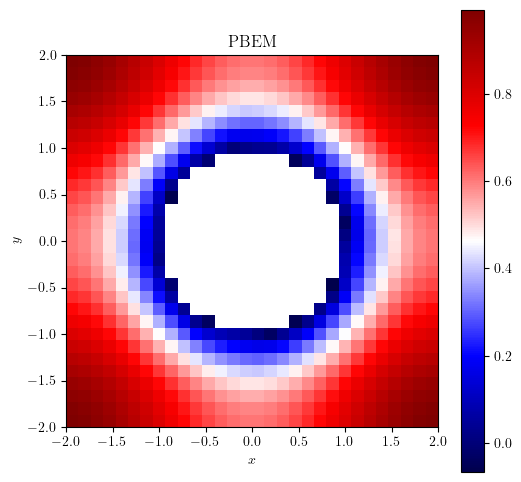

In [11]:
%matplotlib inline
from matplotlib import pylab as plt
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({"text.usetex": True, "font.family": "serif"})
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
pos = ax.imshow(np.real(u_evaluated.T), extent=[-d / 2, d / 2, -d / 2, d / 2], cmap="seismic")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title("PBEM")
plt.colorbar(pos, ax=ax)
plt.show()

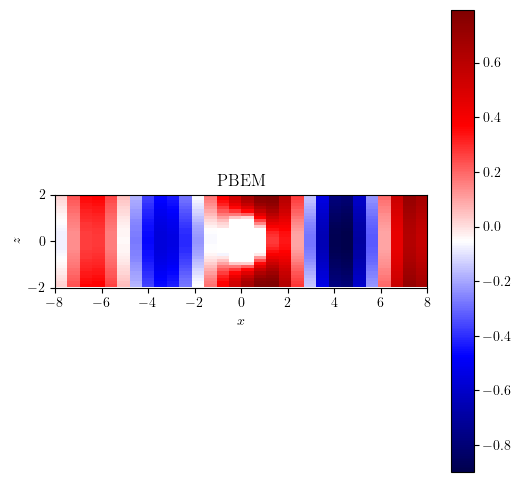

In [8]:
%matplotlib inline
from matplotlib import pylab as plt
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({"text.usetex": True, "font.family": "serif"})
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
pos = ax.imshow(np.real(u_evaluated.T), extent=[-xlim, xlim, -d / 2, d / 2], cmap="seismic")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$z$")
ax.set_title("PBEM")
plt.colorbar(pos, ax=ax)
plt.show()